In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import KFold

In [ ]:
df = pd.read_csv('B-train.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      180 non-null    float64
 1   x2      180 non-null    float64
 2   x3      181 non-null    float64
 3   x4      180 non-null    float64
 4   x5      181 non-null    float64
 5   x6      180 non-null    float64
 6   x7      180 non-null    float64
 7   x8      180 non-null    float64
 8   y       188 non-null    float64
dtypes: float64(9)
memory usage: 13.5 KB


In [ ]:
df = df.dropna(subset=['y'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 189
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      178 non-null    float64
 1   x2      179 non-null    float64
 2   x3      179 non-null    float64
 3   x4      178 non-null    float64
 4   x5      179 non-null    float64
 5   x6      178 non-null    float64
 6   x7      178 non-null    float64
 7   x8      178 non-null    float64
 8   y       188 non-null    float64
dtypes: float64(9)
memory usage: 14.7 KB


In [ ]:
a=0.25
b=0.75

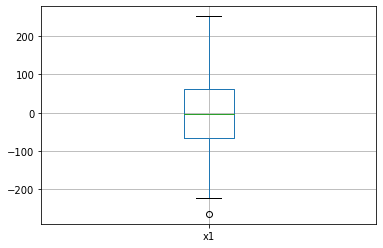

In [ ]:
low,high = df['x1'].quantile([a,b])
iqr=high-low
df = df.drop(df.index[df['x1']<low-(1.5*iqr)])
df = df.drop(df.index[df['x1']>high+(1.5*iqr)])
df.boxplot(column='x1')

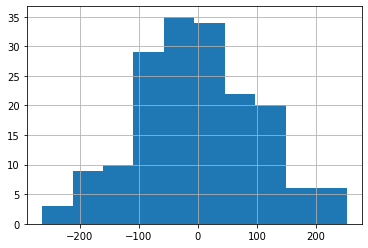

In [ ]:
df['x1'].hist()

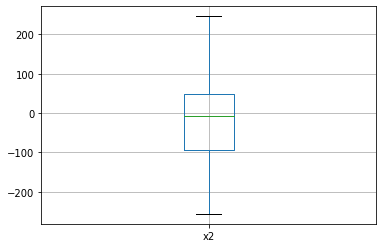

In [ ]:
low,high = df['x2'].quantile([a,b])
iqr=high-low
df = df.drop(df.index[df['x2']<low-(1.5*iqr)])
df = df.drop(df.index[df['x2']>high+(1.5*iqr)])
df.boxplot(column='x2')

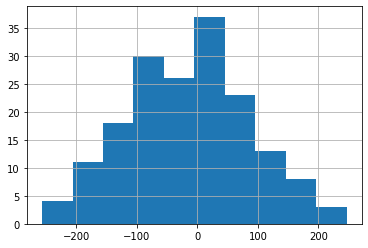

In [ ]:
df['x2'].hist()

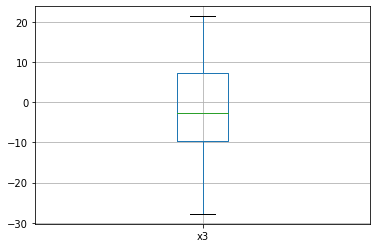

In [ ]:
low,high = df['x3'].quantile([a,b])
iqr=high-low
df = df.drop(df.index[df['x3']<low-(1.5*iqr)])
df = df.drop(df.index[df['x3']>high+(1.5*iqr)])
df.boxplot(column='x3')

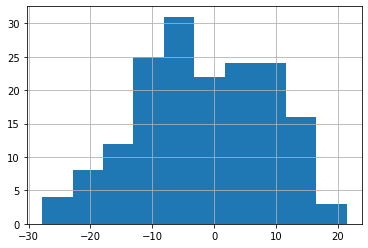

In [ ]:
df['x3'].hist()

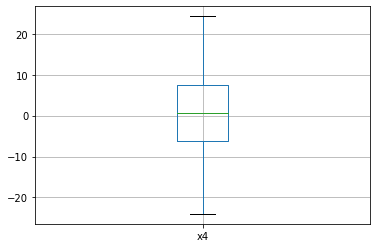

In [ ]:
low,high = df['x4'].quantile([a,b])
iqr=high-low
df = df.drop(df.index[df['x4']<low-(1.5*iqr)])
df = df.drop(df.index[df['x4']>high+(1.5*iqr)])
df.boxplot(column='x4')

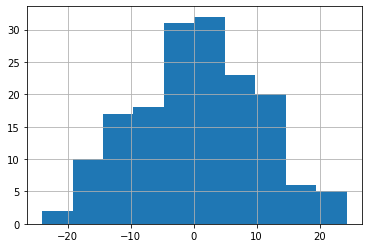

In [ ]:
df['x4'].hist()

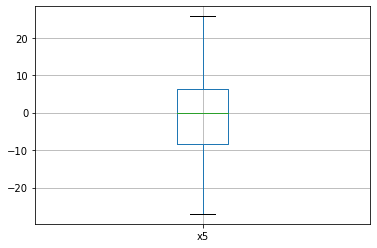

In [ ]:
low,high = df['x5'].quantile([a,b])
iqr=high-low
df = df.drop(df.index[df['x5']<low-(1.5*iqr)])
df = df.drop(df.index[df['x5']>high+(1.5*iqr)])
df.boxplot(column='x5')

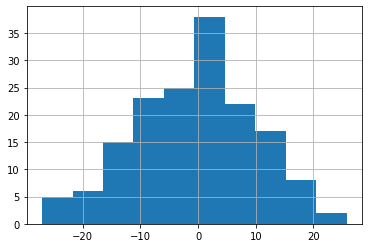

In [ ]:
df['x5'].hist()

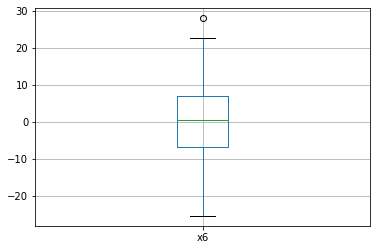

In [ ]:
low,high = df['x6'].quantile([a,b])
iqr=high-low
df = df.drop(df.index[df['x6']<low-(1.5*iqr)])
df = df.drop(df.index[df['x6']>high+(1.5*iqr)])
df.boxplot(column='x6')

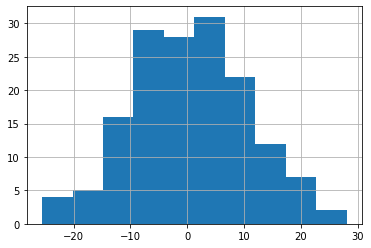

In [ ]:
df['x6'].hist()

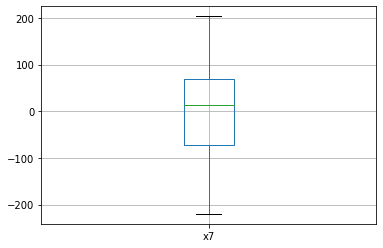

In [ ]:
low,high = df['x7'].quantile([a,b])
iqr=high-low
df = df.drop(df.index[df['x7']<low-(1.5*iqr)])
df = df.drop(df.index[df['x7']>high+(1.5*iqr)])
df.boxplot(column='x7')

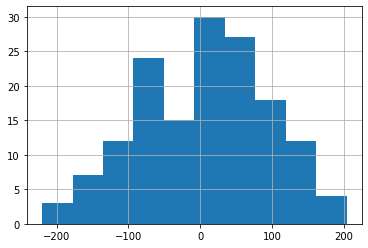

In [ ]:
df['x7'].hist()

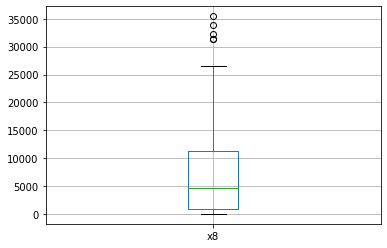

In [ ]:
low,high = df['x8'].quantile([a,b])
iqr=high-low
df = df.drop(df.index[df['x8']<low-(1.5*iqr)])
df = df.drop(df.index[df['x8']>high+(1.5*iqr)])
df.boxplot(column='x8')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 1 to 189
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      137 non-null    float64
 1   x2      140 non-null    float64
 2   x3      139 non-null    float64
 3   x4      138 non-null    float64
 4   x5      138 non-null    float64
 5   x6      137 non-null    float64
 6   x7      136 non-null    float64
 7   x8      137 non-null    float64
 8   y       146 non-null    float64
dtypes: float64(9)
memory usage: 11.4 KB


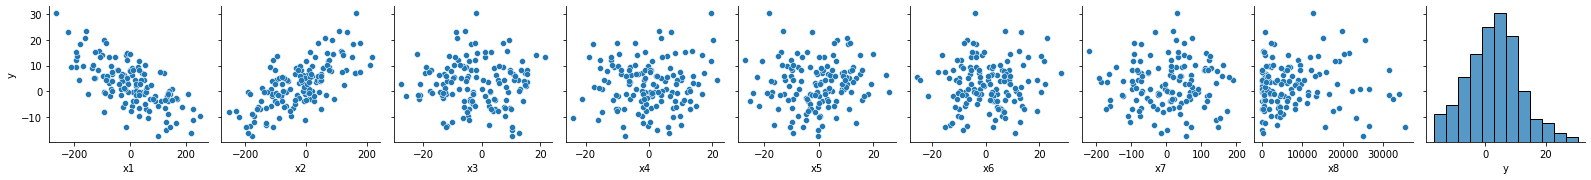

In [ ]:
sns.pairplot(df,x_vars=df.columns,y_vars=['y'])

In [ ]:
df.corr().sort_values('y')[['y']]

,y
x1,-0.688506
x3,-0.018613
x8,-0.005761
x7,0.016220
x6,0.047788
x4,0.064364
x5,0.065400
x2,0.692294
y,1.000000


In [ ]:
# df['x1'] = df['x1'].fillna(0)
# df['x2'] = df['x2'].fillna(0)
# df['x3'] = df['x3'].fillna(0)
# df['x4'] = df['x4'].fillna(0)
# df['x5'] = df['x5'].fillna(0)
# df['x6'] = df['x6'].fillna(0)
# df['x7'] = df['x7'].fillna(0)
# df['x8'] = df['x8'].fillna(0)

# df['x1'] =df['x1'].fillna(df['x1'].mean())
# df['x2'] =df['x2'].fillna(df['x2'].mean())
# df['x3'] =df['x3'].fillna(df['x3'].mean())
# df['x4'] =df['x4'].fillna(df['x4'].mean())
# df['x5'] =df['x5'].fillna(df['x5'].mean())
# df['x6'] =df['x6'].fillna(df['x6'].mean())
# df['x7'] =df['x7'].fillna(df['x7'].mean())
# df['x8'] =df['x8'].fillna(df['x8'].mean())

df = df.dropna()

X=df[['x1','x2','x3','x4','x5','x6','x7','x8']]
y=df['y']
#mean    default 4.084066507644772
# 0         default 4.084240813142153
# dropna default 3.496557249868389
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
lm = LinearRegression()
lm.fit(X_scaled,y)
y_pred = lm.predict(X_scaled)
rmse = metrics.mean_squared_error(y,y_pred,squared=False)
print(rmse)
mape = np.mean(np.abs((y-y_pred)/y))*100
mape

3.496557249868389


inf

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 1 to 184
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      95 non-null     float64
 1   x2      95 non-null     float64
 2   x3      95 non-null     float64
 3   x4      95 non-null     float64
 4   x5      95 non-null     float64
 5   x6      95 non-null     float64
 6   x7      95 non-null     float64
 7   x8      95 non-null     float64
 8   y       95 non-null     float64
dtypes: float64(9)
memory usage: 7.4 KB


In [ ]:
rmse=[]
mape=[]
mae=[]
X=df[['x1','x2']]
# ตัด
# best!!!(mean)
# 4.170581528632588
# 3.389557291766908
from sklearn.model_selection import KFold
kf = KFold(n_splits=80)
for train_index,test_index in kf.split(X):
  X_train = X.iloc[train_index]
  X_test = X.iloc[test_index]
  y_train = y.iloc[train_index]
  y_test = y.iloc[test_index]

  lm = LinearRegression()
  lm.fit(X_train,y_train)
  y_pred = lm.predict(X_test)
  rmse.append(metrics.mean_squared_error(y_test,y_pred,squared=False))
  mape.append(np.mean(np.abs((y_test-y_pred)/y))*100)
  mae.append(np.mean(np.abs(y_test-y_pred)))
print(np.mean(rmse))
print(np.mean(mape))
print(np.mean(mae))
print(rmse)
print(mape)
print(mae)

3.311778722264954
inf
3.2659195638944922
[1.2961323690757778, 0.8922534387339247, 1.874081088379729, 2.6164252374715335, 2.927346385712055, 1.627042267242904, 4.277828771551091, 2.1839857355030277, 2.4741914534956724, 4.856780172732616, 3.448503963711066, 2.5186853148593786, 2.8128839504510292, 2.142181550247173, 4.118099241007976, 6.867679434589444, 2.294130538358682, 3.9670232039613023, 1.3267887012559454, 1.1188110233784725, 5.077390852713529, 2.009892176727684, 5.3651164953893105, 4.11229330482758, 4.567628315530332, 0.9526679754211589, 0.595679067893057, 4.5307511797499735, 3.8538351574027754, 3.4446645347627873, 1.4120653931557476, 1.522571527125216, 4.200483782819279, 2.835745518898205, 3.0628703433484326, 1.2695942975320076, 5.750469714622641, 7.229636797514889, 3.278390188782525, 5.517977680397262, 4.71037493505623, 3.779863923413329, 3.993865961518024, 1.3394932120111722, 0.1015654936115391, 5.785447739193383, 0.007102979253824415, 8.338962785486206, 1.677090977523564, 3.7387

In [ ]:
test = pd.read_csv('B-test.csv')

In [ ]:
test[['x1','x2']]

,x1,x2
0,50.69,-120.50
1,102.08,74.69
2,NaN,49.86
3,49.39,-101.88
4,140.49,59.99
5,54.08,NaN
6,106.48,-50.55
7,-83.82,-104.84
8,147.15,9.14
9,8.68,-207.09


In [ ]:
test[['x1','x2']].mean()

x1    63.913333
x2   -43.464444
dtype: float64

In [ ]:
test['x1'] = test['x1'].fillna(test['x1'].mean())
test['x2'] = test['x2'].fillna(test['x2'].mean())

In [ ]:
test[['x1','x2']]

,x1,x2
0,50.690000,-120.500000
1,102.080000,74.690000
2,63.913333,49.860000
3,49.390000,-101.880000
4,140.490000,59.990000
5,54.080000,-43.464444
6,106.480000,-50.550000
7,-83.820000,-104.840000
8,147.150000,9.140000
9,8.680000,-207.090000


In [ ]:
Xfinal = test[['x1','x2']]
b=test[['x1','x2','x3','x4','x5','x6','x7','x8']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 1 to 184
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      95 non-null     float64
 1   x2      95 non-null     float64
 2   x3      95 non-null     float64
 3   x4      95 non-null     float64
 4   x5      95 non-null     float64
 5   x6      95 non-null     float64
 6   x7      95 non-null     float64
 7   x8      95 non-null     float64
 8   y       95 non-null     float64
dtypes: float64(9)
memory usage: 9.5 KB


In [ ]:
X=df[['x1','x2']]
y=df['y']
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [ ]:
X

,x1,x2
1,120.85,163.83
3,-65.72,-36.37
4,11.00,-64.78
8,-21.32,2.66
11,55.95,-150.63
...,...,...
179,35.20,-103.27
180,32.74,-93.59
182,-194.49,12.72
183,66.13,-89.43


In [ ]:
yfinal = model.predict(Xfinal)

In [ ]:
yfinal

array([-4.96712474,  2.57990348,  3.19888511, -3.93754367, -0.09923065,
       -1.14523889, -4.12830052,  2.55934954, -3.06619901, -7.35598795])